✅ Libraries loaded successfully!
Loaded dataset shape: (938603, 8)
Class distribution:
Hazardous
0.0    936537
1.0      2066
Name: count, dtype: int64
Class distribution after SMOTE: {0.0: 936537, 1.0: 936537}
Class distribution after SMOTE-Tomek: {0.0: 936537, 1.0: 936537}
Class distribution after SMOTE-ENN: {0.0: 934254, 1.0: 936537}


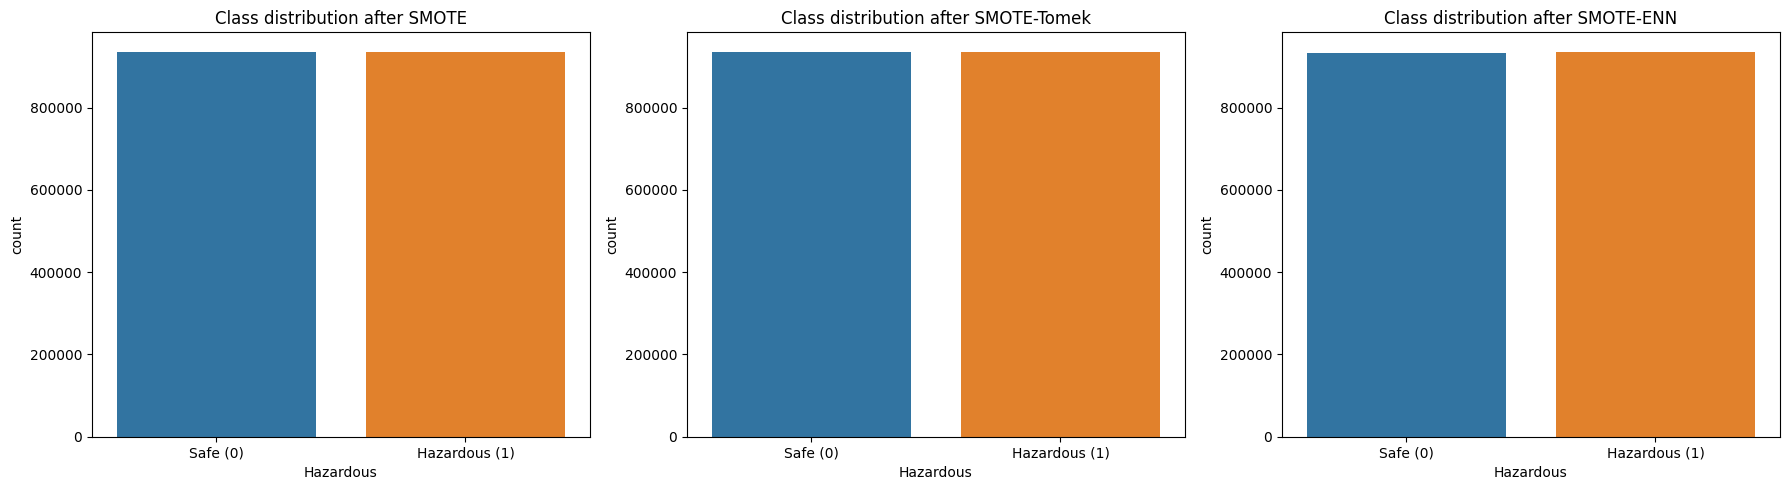

Balanced class distribution plots saved to figures/day3_class_distribution.png
Saved balanced dataset: ../../data/balanced/asteroid_smote.csv (1873074 rows, 8 columns)
Saved balanced dataset: ../../data/balanced/asteroid_smote_tomek.csv (1873074 rows, 8 columns)
Saved balanced dataset: ../../data/balanced/asteroid_smote_enn.csv (1870791 rows, 8 columns)

DAY 3 RESEARCH NOTES:

- SMOTE creates synthetic hazardous samples by interpolating neighbors.
- SMOTE-Tomek adds cleaning by removing Tomek links (noisy samples close to class boundary).
- SMOTE-ENN further cleans by editing neighbors on both sides.
- Compare these methods for best tradeoff between recall and false alarms.
- Future work: Experiment with k_neighbors and sampling_strategy parameters.
- Record all observations for paper results section.



In [4]:
# Day 3: SMOTE Balancing and Sampling Variants
# Asteroid Hazard Classification Project
# Created on October 30, 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Correct imports for SMOTE variants
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

print("✅ Libraries loaded successfully!")

# Step 1: Load the processed Day 2 dataset
data_path = '../../data/processed/asteroid_processed.csv'
df = pd.read_csv(data_path)

print(f"Loaded dataset shape: {df.shape}")
print(f"Class distribution:\n{df['Hazardous'].value_counts()}")

# Separate features and target
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

# Step 2: Initialize SMOTE variants with fixed random seed
smote = SMOTE(random_state=42)
smote_tomek = SMOTETomek(random_state=42)
smote_enn = SMOTEENN(random_state=42)

# Step 3: Apply each balancing method
X_smote, y_smote = smote.fit_resample(X, y)
X_stomek, y_stomek = smote_tomek.fit_resample(X, y)
X_smenn, y_smenn = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTE:", dict(zip(*np.unique(y_smote, return_counts=True))))
print("Class distribution after SMOTE-Tomek:", dict(zip(*np.unique(y_stomek, return_counts=True))))
print("Class distribution after SMOTE-ENN:", dict(zip(*np.unique(y_smenn, return_counts=True))))

# Step 4: Visualize balanced class distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, y_balanced, title in zip(axes, [y_smote, y_stomek, y_smenn], ['SMOTE', 'SMOTE-Tomek', 'SMOTE-ENN']):
    sns.countplot(x=y_balanced, ax=ax)
    ax.set_title(f'Class distribution after {title}')
    ax.set_xticklabels(['Safe (0)', 'Hazardous (1)'])
    
plt.tight_layout()
plt.savefig('../../figures/day3_class_distribution.png', dpi=300)
plt.show()
print("Balanced class distribution plots saved to figures/day3_class_distribution.png")

# Step 5: Save balanced datasets for Day 4 training
def save_balanced_dataset(X, y, filename):
    df_balanced = pd.DataFrame(X, columns=X.columns)
    df_balanced['Hazardous'] = y.values
    df_balanced.to_csv(filename, index=False)
    print(f"Saved balanced dataset: {filename} ({df_balanced.shape[0]} rows, {df_balanced.shape[1]} columns)")

save_balanced_dataset(X_smote, y_smote, '../../data/balanced/asteroid_smote.csv')
save_balanced_dataset(X_stomek, y_stomek, '../../data/balanced/asteroid_smote_tomek.csv')
save_balanced_dataset(X_smenn, y_smenn, '../../data/balanced/asteroid_smote_enn.csv')

# Step 6: Research notes placeholder for your records
print("""
DAY 3 RESEARCH NOTES:

- SMOTE creates synthetic hazardous samples by interpolating neighbors.
- SMOTE-Tomek adds cleaning by removing Tomek links (noisy samples close to class boundary).
- SMOTE-ENN further cleans by editing neighbors on both sides.
- Compare these methods for best tradeoff between recall and false alarms.
- Future work: Experiment with k_neighbors and sampling_strategy parameters.
- Record all observations for paper results section.
""")


In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

# Initialize oversamplers
smote = SMOTE(random_state=42)
smote_tomek = SMOTETomek(random_state=42)
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTE
X_smote, y_smote = smote.fit_resample(X, y)
X_stomek, y_stomek = smote_tomek.fit_resample(X, y)
X_smenn, y_smenn = smote_enn.fit_resample(X, y)

# Print new class distribution
print("After SMOTE:", dict(zip(*np.unique(y_smote, return_counts=True))))
print("After SMOTE-Tomek:", dict(zip(*np.unique(y_stomek, return_counts=True))))
print("After SMOTE-ENN:", dict(zip(*np.unique(y_smenn, return_counts=True))))


After SMOTE: {0.0: 936537, 1.0: 936537}
After SMOTE-Tomek: {0.0: 936537, 1.0: 936537}
After SMOTE-ENN: {0.0: 934254, 1.0: 936537}


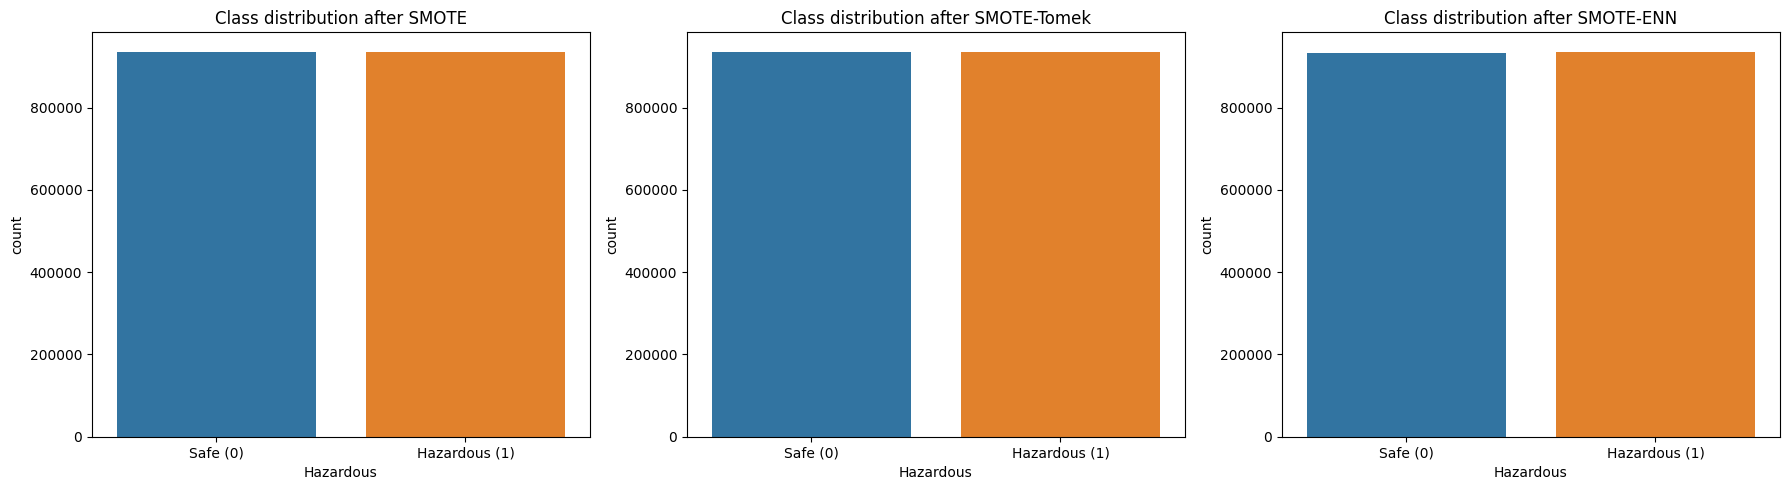

✅ Distribution visualizations saved to figures/day3_class_distribution.png


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ["SMOTE", "SMOTE-Tomek", "SMOTE-ENN"]
dataset_labels = [
    ("y_smote", y_smote),
    ("y_stomek", y_stomek),
    ("y_smenn", y_smenn)
]

for ax, (label, y_bal), title in zip(axes, dataset_labels, titles):
    sns.countplot(x=y_bal, ax=ax)
    ax.set_title(f'Class distribution after {title}')
    ax.set_xticklabels(['Safe (0)', 'Hazardous (1)'])

plt.tight_layout()
plt.savefig('../../figures/day3_class_distribution.png', dpi=300)
plt.show()
print("✅ Distribution visualizations saved to figures/day3_class_distribution.png")


In [9]:
def save_balanced_dataset(X, y, filename):
    df_balanced = pd.DataFrame(X, columns=X.columns)
    df_balanced['Hazardous'] = y.values
    df_balanced.to_csv(filename, index=False)
    print(f"✅ Saved balanced dataset: {filename} | {df_balanced.shape[0]} rows, {df_balanced.shape[1]} columns")

save_balanced_dataset(X_smote, y_smote, '../../data/balanced/asteroid_smote.csv')
save_balanced_dataset(X_stomek, y_stomek, '../../data/balanced/asteroid_smote_tomek.csv')
save_balanced_dataset(X_smenn, y_smenn, '../../data/balanced/asteroid_smote_enn.csv')


✅ Saved balanced dataset: ../../data/balanced/asteroid_smote.csv | 1873074 rows, 8 columns
✅ Saved balanced dataset: ../../data/balanced/asteroid_smote_tomek.csv | 1873074 rows, 8 columns
✅ Saved balanced dataset: ../../data/balanced/asteroid_smote_enn.csv | 1870791 rows, 8 columns
